In [46]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np

In [18]:
# One pass of the entire data set through the model is called an epoch
# The batch size is how many data entries pass through the model in one iteration
# The number of classes is 10 to represent each of the 10 digits from 0-9
# These variables are also known as hyperparameters, parameters that are set before the training process

batch_size = 128
n_classes = 10
n_epochs = 15

im_row, im_col = 28, 28

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

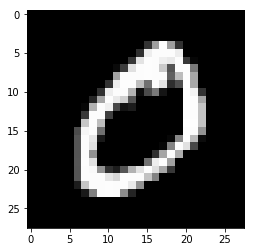

In [20]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.imshow(x_train[1], cmap='gray')
plt.show()

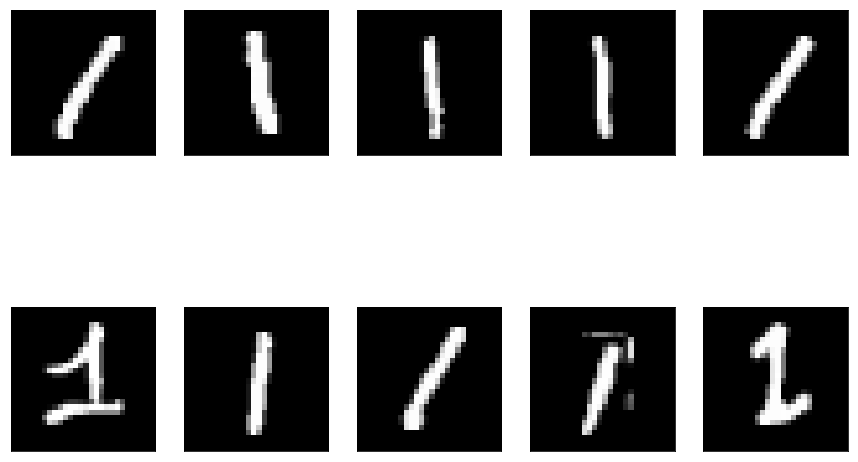

In [22]:
# Just looking at 10 examples of the digit 1, you can see there is plenty of variation in the data set
fig = plt.figure(figsize=(15, 10))

i = 0
for f in range(0, y_train.shape[0]):
    if (y_train[f] == 1 and i < 10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_train[f], cmap='gray')
        plt.xticks([])
        plt.yticks([])
        i = i + 1

plt.show()

In [23]:
print("x_train: {}\nx_test: {}\n".format(x_train.shape, x_test.shape))

x_train: (60000, 28, 28)
x_test: (10000, 28, 28)



In [28]:
# In this case, it’s grey scale, so you don’t have to worry about the channel variable, but the following code will account for both cases if you end up using a data set with color 
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, im_row, im_col)
    x_test = x_test.reshape(x_test.shape[0], 1, im_row, im_col)
    input_shape = (1, im_row, im_col)
    
else:
    x_train = x_train.reshape(x_train.shape[0], im_row, im_col, 1)
    x_test = x_test.reshape(x_test.shape[0], im_row, im_col, 1)
    input_shape = (im_row, im_col, 1)


In [29]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# What keras.utils.to_categorical() does is take the vector of classes and create a binary class matrix of the number of classes
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)


In [35]:
print("x_train: {}\nx_test: {}\ninput_shape: {}\n \
# of training samples: {}\n# of testing samples: {}"
      .format(x_train.shape, 
              x_test.shape, 
              input_shape, x_train.shape[0],
              x_test.shape[0]))

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)
input_shape: (28, 28, 1)
 # of training samples: 60000
# of testing samples: 10000


In [59]:
# In Keras, the sequential model is a stack of layers. The Conv2D is a two-dimensional convolutional layer.

# In convolutional neural networks, a convolution layer filters through the data and multiplies each of the values element-wise by the weights in the filter and sums them up to generate one value. In this case, it’s a 3x3 filter that slides over each of the pixels to generate a smaller layer called an activation map or feature map . This feature map then has another filter applied to it in the second convolutional layer to generate another, smaller feature map. The weights that are optimized during backpropagation are found in the filter.
# rectified linear unit (ReLU) y = max(0, x)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), 
                activation='relu',
                input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Note how it tells you the output shapes of each layer and the number of parameters; this can be useful when creating custom models and finding out that there is a mismatch between the dimensionality of what a layer expects and what it actually receives
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)             

In [65]:
# The variable checkpoint will store the model in the same folder as this code with the name keras_MNIST_CNN.h5
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="keras_MNIST_CNN.h5", 
                            verbose=0,
                            save_best_only=True)
model.fit(x_train, y_train, 
          batch_size=batch_size, 
          epochs=n_epochs, 
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[checkpoint])

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.2409 - accuracy: 0.9264 - val_loss: 0.0534 - val_accuracy: 0.9814
Epoch 2/15
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0829 - accuracy: 0.9759 - val_loss: 0.0382 - val_accuracy: 0.9877
Epoch 3/15
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0626 - accuracy: 0.9811 - val_loss: 0.0328 - val_accuracy: 0.9893
Epoch 4/15
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0497 - accuracy: 0.9842 - val_loss: 0.0316 - val_accuracy: 0.9895
Epoch 5/15
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.0417 - accuracy: 0.9868 - val_loss: 0.0325 - val_accuracy: 0.9892
Epoch 6/15
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.0380 - accuracy: 0.9877 - val_loss: 0.0277 - val_accuracy: 0.9915
Epoch 7/15
60000/60000 [==============================] 

In [66]:
from sklearn.metrics import roc_auc_score

preds = model.predict(x_test)
auc = roc_auc_score(np.round(preds), y_test)
print("AUC: {:.2%}".format(auc))

AUC: 99.58%


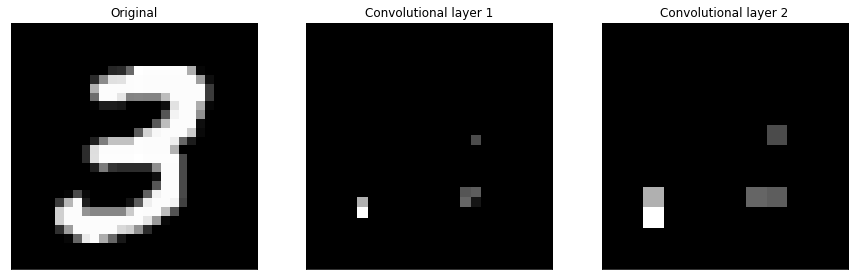

In [70]:
# generate graphs of what the images look like at various stages of the model
layers = [layer.output for layer in model.layers[:4]]
model_layers = tf.keras.models.Model(inputs=model.input, outputs=layers)
activations = model_layers.predict(x_train)

fig = plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(x_train[7].reshape(28, 28), cmap='gray')
plt.xticks([])
plt.yticks([])

for f in range(1, 3):
    plt.subplot(1, 3, f + 1)
    plt.title("Convolutional layer %s" % f)
    plt.imshow(activations[f][7, :, :, 0], cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.show()